In [1]:
import numpy as np
import matplotlib.pyplot as plt
from curve_generator import numerical_tangent_function, ellipse_function

In [2]:

L = 1.0
N = 101
h = (L / N)

# Create the array of vertices, xyz indexing.
V_ind = np.asarray([[[[i,j,k] for k in range(N)] for j in range(N)] for i in range(N)])
V = V_ind * h
V.shape

(101, 101, 101, 3)

In [3]:
t_range = np.linspace(0, 1, N)
t_range

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [4]:
circle_curve = np.array([ellipse_function(t) for t in t_range])
circle_curve

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.98026728e-01,  6.27905195e-02,  0.00000000e+00],
       [ 9.92114701e-01,  1.25333234e-01,  0.00000000e+00],
       [ 9.82287251e-01,  1.87381315e-01,  0.00000000e+00],
       [ 9.68583161e-01,  2.48689887e-01,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01,  0.00000000e+00],
       [ 9.29776486e-01,  3.68124553e-01,  0.00000000e+00],
       [ 9.04827052e-01,  4.25779292e-01,  0.00000000e+00],
       [ 8.76306680e-01,  4.81753674e-01,  0.00000000e+00],
       [ 8.44327926e-01,  5.35826795e-01,  0.00000000e+00],
       [ 8.09016994e-01,  5.87785252e-01,  0.00000000e+00],
       [ 7.70513243e-01,  6.37423990e-01,  0.00000000e+00],
       [ 7.28968627e-01,  6.84547106e-01,  0.00000000e+00],
       [ 6.84547106e-01,  7.28968627e-01,  0.00000000e+00],
       [ 6.37423990e-01,  7.70513243e-01,  0.00000000e+00],
       [ 5.87785252e-01,  8.09016994e-01,  0.00000000e+00],
       [ 5.35826795e-01,  8.44327926e-01

In [5]:
curve_tangents = np.array([numerical_tangent_function(t, ellipse_function, h = 1 / circle_curve.shape[0]) for t in t_range])
curve_tangents

array([[ 2.80331314e-15,  6.28318217e+00,  0.00000000e+00],
       [-3.94524273e-01,  6.27078375e+00,  0.00000000e+00],
       [-7.87491539e-01,  6.23363740e+00,  0.00000000e+00],
       [-1.17735094e+00,  6.17188974e+00,  0.00000000e+00],
       [-1.56256387e+00,  6.08578445e+00,  0.00000000e+00],
       [-1.94161007e+00,  5.97566135e+00,  0.00000000e+00],
       [-2.31299363e+00,  5.84195504e+00,  0.00000000e+00],
       [-2.67524885e+00,  5.68519320e+00,  0.00000000e+00],
       [-3.02694610e+00,  5.50599451e+00,  0.00000000e+00],
       [-3.36669737e+00,  5.30506617e+00,  0.00000000e+00],
       [-3.69316182e+00,  5.08320116e+00,  0.00000000e+00],
       [-4.00505105e+00,  4.84127507e+00,  0.00000000e+00],
       [-4.30113417e+00,  4.58024268e+00,  0.00000000e+00],
       [-4.58024268e+00,  4.30113417e+00,  0.00000000e+00],
       [-4.84127507e+00,  4.00505105e+00,  0.00000000e+00],
       [-5.08320116e+00,  3.69316182e+00,  0.00000000e+00],
       [-5.30506617e+00,  3.36669737e+00

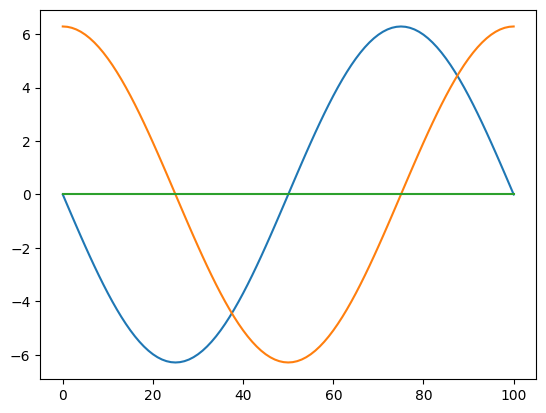

In [6]:
plt.plot(curve_tangents)

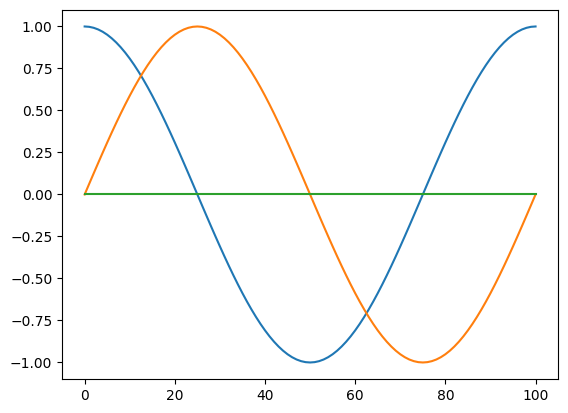

In [7]:
plt.plot(circle_curve)

In [8]:
np.sum(np.cross(circle_curve, curve_tangents)) * 1/2 / 101

np.float64(3.1415910858914255)

In [14]:
def generate_area_curve(t_values, curve_function):
    h = 1 / t_values.shape[0] # Assumes that curve from 0 to 1.
    
    curve_points = np.array([curve_function(t) for t in t_range])
    tangents = np.array([numerical_tangent_function(t, curve_function, h = h) for t in t_values])

    return np.sum(np.cross(curve_points, tangents), axis = 0) * 0.5 / t_values.shape[0]

In [16]:
generate_area_curve(t_range, lambda t: ellipse_function(t, a = 1, b = 1))

array([0.        , 0.        , 3.14159109])